In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import statsmodels.formula.api as smf
import pickle
from sklearn.metrics import classification_report,precision_score,recall_score,accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc,ConfusionMatrixDisplay

In [38]:
df=pd.read_csv("telecommunications_churn.csv")
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [94]:
•   account_length           (Number of times the account was active)
•	voice_mail_plan          (0: don’t have plan, 1: Have plan)
•	voice_mail_messages      (no. of voice mail received)
•	day_mins                 (no. of min used in day time)
•	evening_mins             (no. of min used in evening)
•	night_mins               (no. of min used in night)
•	international_mins       (no. of min used for international calls)
•	customer_service_calls   (no of times cx contacted the customer service)
•	international_plan       (0: don’t have plan, 1: Have plan)
•	day_calls                (no. of calls in day time)
•	day_charge               (charge of day calls)
•	evening_calls            (no. of calls in evening time)
•	evening_charge           (charge of evening calls)
•	night_calls              (no. of calls in night time)
•	night_charge             (charge of night calls)
•	international_calls      (no. of international calls)
•	international_charge     (charge of international calls)
•	total_charge             (sum of day charge, evening charge, night charge and international charge)
•	churn: This is the target variable. It is the one that determines whether the client is still in the company or not. (1-Churn, 0-No Churn)


SyntaxError: invalid character '•' (U+2022) (2738241387.py, line 1)

In [96]:
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [244]:
params=df.drop('churn', axis=1)
params

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,99,91,3,75.56
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,103,103,3,59.24
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,110,104,5,62.29
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,88,89,7,66.80
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,122,121,3,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,126,83,6,60.10
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,55,123,4,63.53
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,58,91,6,67.74
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,84,137,10,57.53


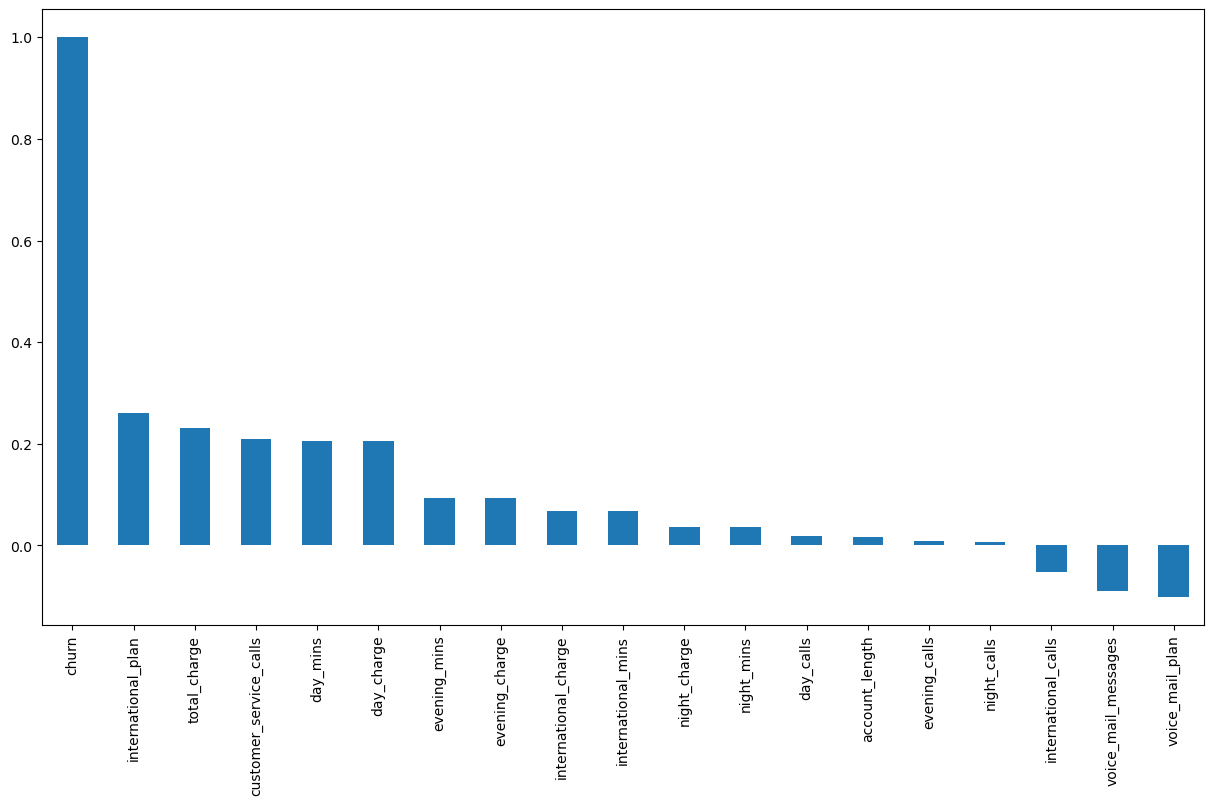

In [98]:
plt.figure(figsize=(15,8))
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')
plt.show();

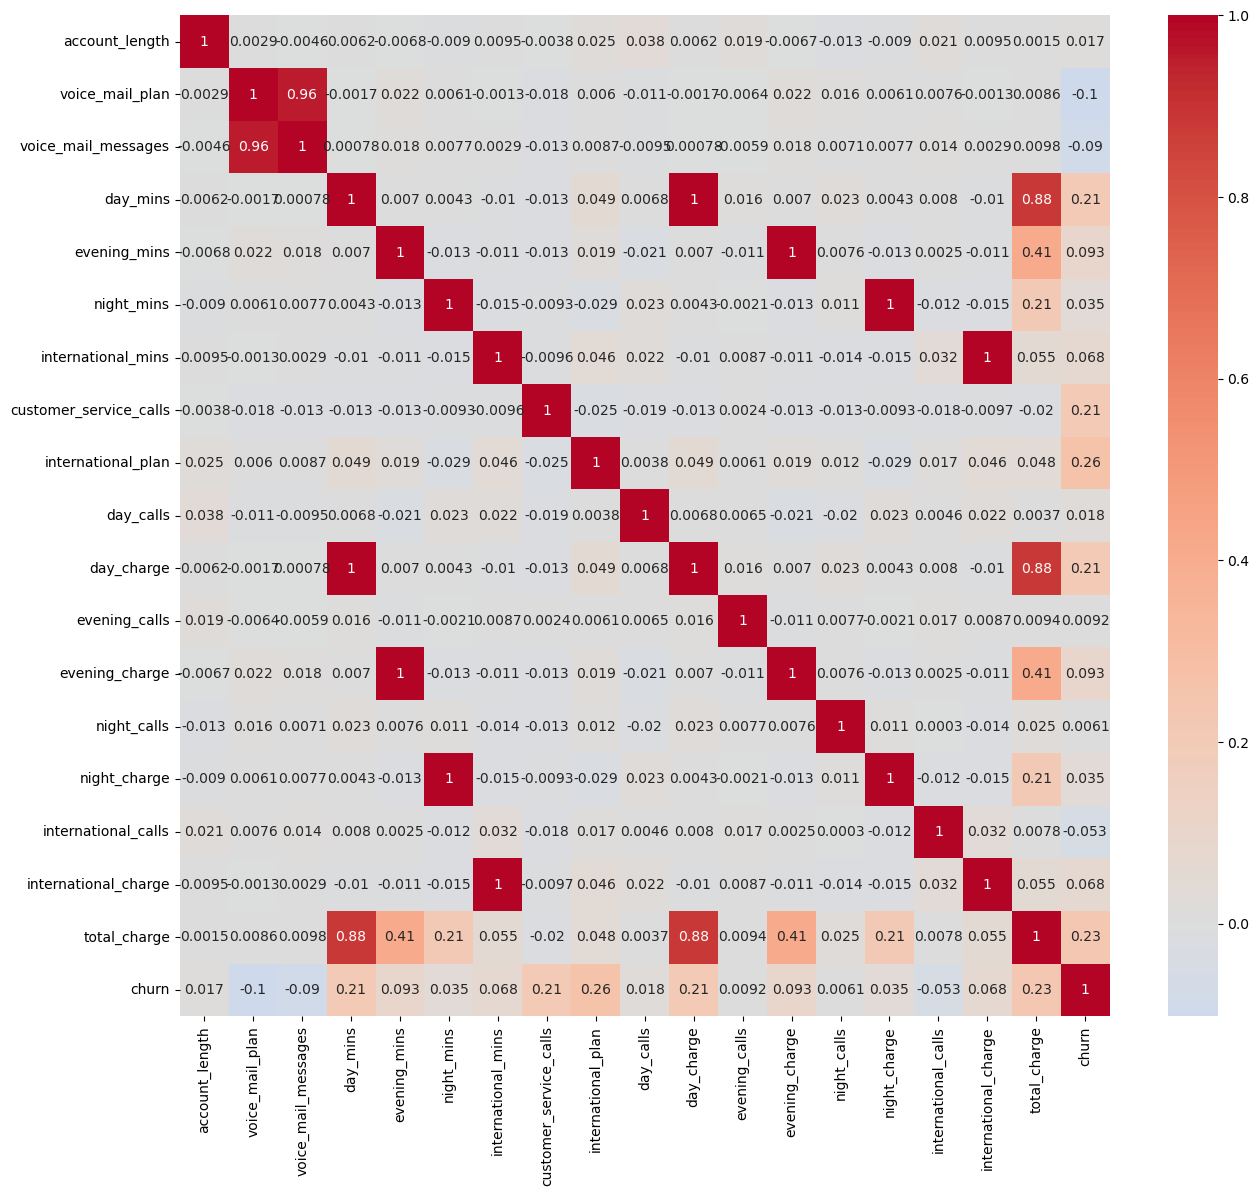

In [100]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

In [101]:
# InternationalCharges_churn_no=df[df["churn"]==1].international_charge # Not leaving the Company

# InternationalCharges_churn_yes=df[df["churn"]==0].international_charge # Leaving the Company

# plt.hist([DayCharges_churn_yes, DayCharges_churn_no], color=["red", "green"], label=["Churn=Yes", "Churn=No"])
# plt.legend()
# plt.xlabel("International Charges")
# plt.ylabel("Number of Customers")
# plt.title("Customer Churn Analysis using International Charges")
# plt.show()

## Dropping Other charges as they equal to Total charge

In [103]:
drop = ['day_charge','evening_charge','night_charge','international_charge']
df = df.drop(columns=drop)

In [224]:
params=df.columns

In [109]:
df['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [111]:
#Removal of columns as per Variance

In [113]:
# Oulier detection

In [115]:
x = df.drop("churn", axis=1)
y = df.churn

In [117]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=45)

In [119]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)
bln_train_x, bln_train_y = sm.fit_resample(train_x, train_y)

In [121]:
bln_train_y.shape

(4556,)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_bln_train_x= scaler.fit_transform(bln_train_x)
sc_test_x= scaler.transform(test_x)

In [126]:
with open(file="scaler.pkl", mode="wb") as s:
    pickle.dump(scaler, s)

### Applying Logistic Regression

In [129]:
logistic_regn_model = LogisticRegression()
logistic_regn_model.fit(sc_bln_train_x, bln_train_y)

LogisticRegression()

In [131]:
logistic_regn_pred = logistic_regn_model.predict(sc_test_x)


In [133]:
confusion_matrix(test_y,logistic_regn_pred)

array([[419, 153],
       [ 29,  66]], dtype=int64)

In [135]:
print(classification_report(test_y, logistic_regn_pred))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       572
           1       0.30      0.69      0.42        95

    accuracy                           0.73       667
   macro avg       0.62      0.71      0.62       667
weighted avg       0.84      0.73      0.76       667



### Applying Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 'n_estimators' defines the number of trees in the forest.
# 'random_state' ensures reproducibility.


In [142]:
rf_model.fit(sc_bln_train_x, bln_train_y)

RandomForestClassifier(random_state=42)

In [143]:
rf_model_pred = rf_model.predict(sc_test_x)


In [144]:
print(classification_report(test_y, rf_model_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       572
           1       0.91      0.74      0.81        95

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



### Applying XGBoost

In [149]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from xgboost.sklearn import XGBClassifier



In [151]:
xgb_model=XGBClassifier()

In [153]:
xgb_model.fit(sc_bln_train_x, bln_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [198]:
xgb_pred = xgb_model.predict(sc_test_x)

In [200]:
print(classification_report(test_y, xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       572
           1       0.90      0.83      0.86        95

    accuracy                           0.96       667
   macro avg       0.94      0.91      0.92       667
weighted avg       0.96      0.96      0.96       667



In [296]:
print(classification_report(test_y, y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       572
           1       0.89      0.81      0.85        95

    accuracy                           0.96       667
   macro avg       0.93      0.90      0.91       667
weighted avg       0.96      0.96      0.96       667



In [202]:
# Compute the confusion matrices
rf_cm = confusion_matrix(test_y, rf_model_pred)
xgb_cm = confusion_matrix(test_y, xgb_pred)


# Precision
rf_precision = precision_score(test_y, rf_model_pred)
xgb_precision = precision_score(test_y, xgb_pred)

# Recall
rf_recall = recall_score(test_y, rf_model_pred)
xgb_recall = recall_score(test_y, xgb_pred)

# Accuracy
rf_accuracy = accuracy_score(test_y, rf_model_pred)
xgb_accuracy = accuracy_score(test_y, xgb_pred)

# Display metrics
print(f"Random Forest - Precision: {rf_precision:.3f}, Recall: {rf_recall:.3f}, Accuracy: {rf_accuracy:.3f}")
print(f"XGBoost - Precision: {xgb_precision:.3f}, Recall: {xgb_recall:.3f}, Accuracy: {xgb_accuracy:.3f}")


# Display confusion matrices
print("Random Forest Confusion Matrix:")
print(rf_cm)

print("\nXGBoost Confusion Matrix:")
print(xgb_cm)


Random Forest - Precision: 0.909, Recall: 0.737, Accuracy: 0.952
XGBoost - Precision: 0.898, Recall: 0.832, Accuracy: 0.963
Random Forest Confusion Matrix:
[[565   7]
 [ 25  70]]

XGBoost Confusion Matrix:
[[563   9]
 [ 16  79]]


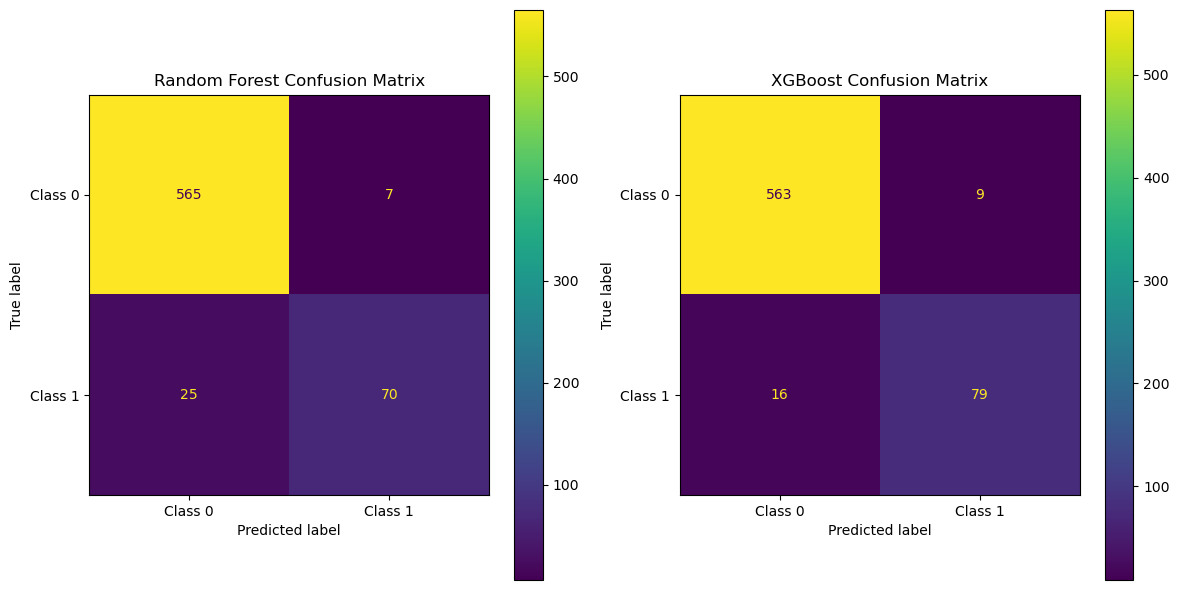

In [204]:
# Plot Confusion Matrix for Random Forest
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(rf_cm, display_labels=['Class 0', 'Class 1']).plot(ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")

# Plot Confusion Matrix for XGBoost
ConfusionMatrixDisplay(xgb_cm, display_labels=['Class 0', 'Class 1']).plot(ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")

plt.tight_layout()
plt.show()


In [206]:
#AUC Score

In [208]:
# Predict probabilities
rf_probs = rf_model.predict_proba(sc_test_x)[:, 1]  # Only positive class probabilities
xgb_probs = xgb_model.predict_proba(sc_test_x)[:, 1]

# Calculate ROC-AUC scores
rf_auc = roc_auc_score(test_y, rf_probs)
xgb_auc = roc_auc_score(test_y, xgb_probs)

print(f'Random Forest AUC: {rf_auc:.3f}')
print(f'XGBoost AUC: {xgb_auc:.3f}')


Random Forest AUC: 0.910
XGBoost AUC: 0.899


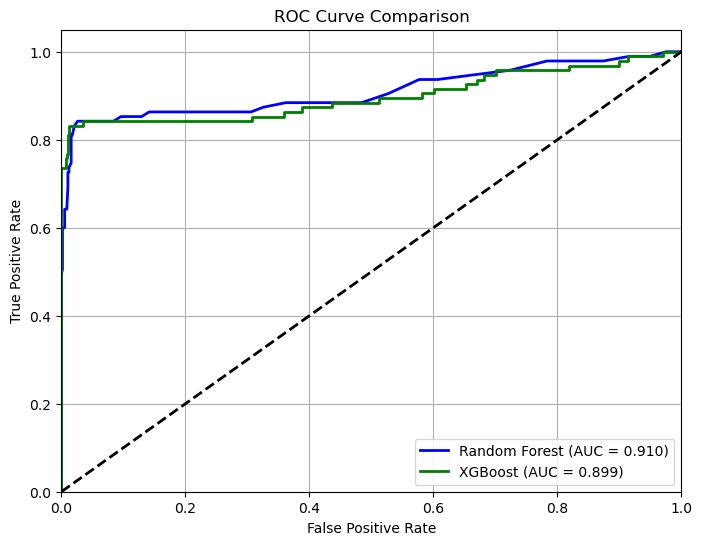

In [210]:
# Compute ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(test_y, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Compute ROC curve and AUC for XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(test_y, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})', color='blue', linewidth=2)
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.3f})', color='green', linewidth=2)

# Plotting the random classifier line (AUC=0.5)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [212]:
#Irrespective of greater AUC score, we will still proceed with XGBoost because in our scenario focus should be on Type-2 error or recall.

In [220]:
#Parameter tuning 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [278]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

In [280]:
random_search=RandomizedSearchCV(xgb_model,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3, param_distributions=param_distributions)
random_search.fit(sc_bln_train_x, bln_train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 6, 9, 12],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc', verbose=3)

In [281]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [282]:
params=random_search.best_params_
params

{'subsample': 0.8,
 'reg_lambda': 2,
 'reg_alpha': 0.1,
 'n_estimators': 100,
 'max_depth': 9,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [292]:
xgb2 = XGBClassifier(subsample = 0.8,
 reg_lambda= 2,
 reg_alpha= 0.1,
 n_estimators= 100,
 max_depth=9,
 learning_rate=0.2,
 gamma=0,
 colsample_bytree=0.8)
xgb2.fit(sc_bln_train_x, bln_train_y)
y_pred4  = xgb2.predict(sc_test_x)

In [294]:
print(classification_report(test_y, y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       572
           1       0.89      0.81      0.85        95

    accuracy                           0.96       667
   macro avg       0.93      0.90      0.91       667
weighted avg       0.96      0.96      0.96       667



In [171]:
!pip install sklearn_pandas

In [172]:
#Pipelining

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper

In [175]:
X = df.drop("churn", axis=1)
y = df.churn

In [177]:
m = DataFrameMapper([(['voice_mail_plan',LabelEncoder()]),(['international_plan',LabelEncoder()])])

In [178]:
classifier = []
classifier.append(("mapper",m))
classifier.append(("model", XGBClassifier(n_estimators=150)))

In [179]:
classifier

[('mapper',
  DataFrameMapper(drop_cols=[],
                  features=[['voice_mail_plan', LabelEncoder()],
                            ['international_plan', LabelEncoder()]])),
 ('model',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=150, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...))]

In [180]:
model= Pipeline(classifier)

In [181]:
model.fit(X,y)

Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[['voice_mail_plan', LabelEncoder()],
                                           ['international_plan',
                                            LabelEncoder()]])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [182]:
with open(file="ML_IIT.pkl", mode="wb") as f:
    pickle.dump(model, f)

In [183]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'evening_calls', 'night_calls', 'international_calls', 'total_charge',
       'churn'],
      dtype='object')

In [184]:
df["night_calls"].max()

175